<a href="https://colab.research.google.com/github/sajeebju/Deep-Learning/blob/main/LeNet-Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses 

In [11]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

In [12]:
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train.shape

TensorShape([60000, 32, 32])

In [13]:
x_train[0]

<tf.Tensor: shape=(32, 32), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [14]:
x_train = tf.expand_dims(x_train, axis = 3, name = None)
x_test = tf.expand_dims(x_test, axis = 3, name = None)

x_train.shape

TensorShape([60000, 32, 32, 1])

In [15]:
x_val = x_train[-2000:, :, :, :]
y_val = y_train[-2000:]
x_train = x_train[:-2000, :, :, :]
y_train = y_train[:-2000]

In [16]:
x_train.shape[1:]

TensorShape([32, 32, 1])

Convolutional Model

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation = 'tanh', input_shape = x_train.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16, 5, activation = 'tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation = 'tanh'))

model.add(layers.Flatten())
model.add(layers.Dense(84, activation = 'tanh'))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
activation (Activation)      (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)        

In [19]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
907/907 [==============================] - 9s 3ms/step - loss: 2.0144 - accuracy: 0.2491 - val_loss: 0.3068 - val_accuracy: 0.9160
Epoch 2/40
907/907 [==============================] - 2s 3ms/step - loss: 0.3935 - accuracy: 0.8782 - val_loss: 0.1872 - val_accuracy: 0.9500
Epoch 3/40
907/907 [==============================] - 2s 3ms/step - loss: 0.2863 - accuracy: 0.9099 - val_loss: 0.1689 - val_accuracy: 0.9475
Epoch 4/40
907/907 [==============================] - 2s 3ms/step - loss: 0.2284 - accuracy: 0.9265 - val_loss: 0.1837 - val_accuracy: 0.9430
Epoch 5/40
907/907 [==============================] - 2s 3ms/step - loss: 0.1937 - accuracy: 0.9387 - val_loss: 0.1217 - val_accuracy: 0.9645
Epoch 6/40
907/907 [==============================] - 2s 3ms/step - loss: 0.1639 - accuracy: 0.9484 - val_loss: 0.1275 - val_accuracy: 0.9635
Epoch 7/40
907/907 [==============================] - 2s 3ms/step - loss: 0.1455 - accuracy: 0.9545 - val_loss: 0.0973 - val_accuracy: 0.9740
Epoch 

Losses and accuracies for training and validation sets are stored in history object and plotted using Matplotlib library.

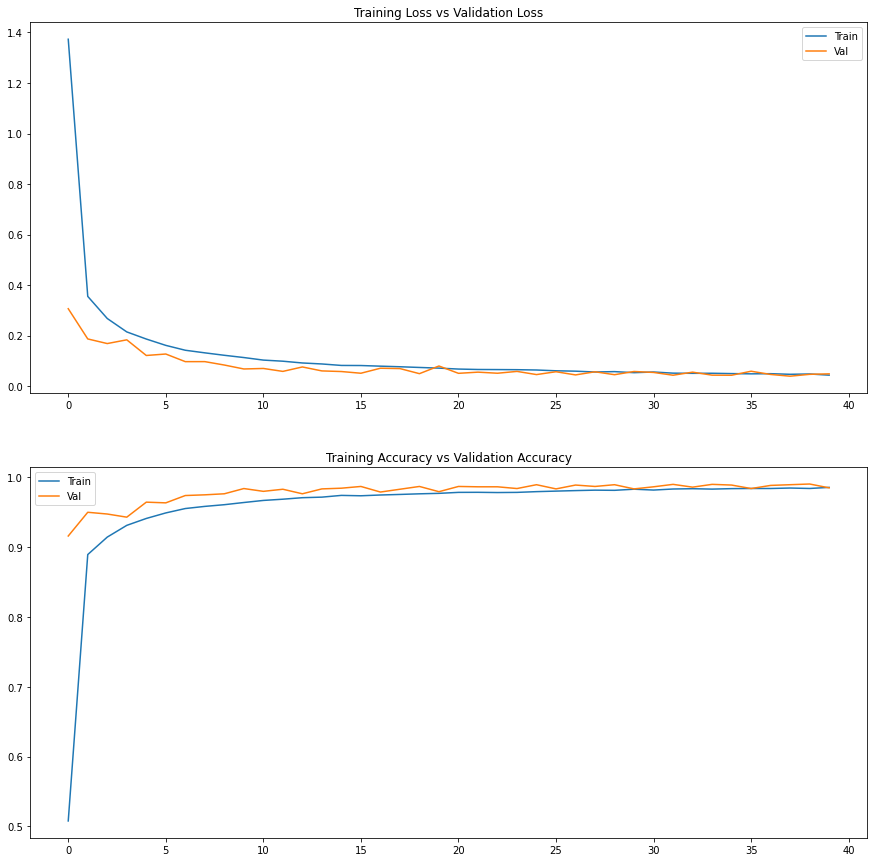

In [20]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

Testing accuracy of the model came out at 98.51%, which is pretty satisfactory for this simple task and reasonably slightly lower than training accuracy. The graph above and the testing accuracy indicates that the model is capable of learning the patterns of digit drawings and generalizable enough not to overfit.

In [21]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0554 - accuracy: 0.9814


[0.0553949698805809, 0.9814000129699707]